In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.district.value_counts()

8.0     33517
11.0    32001
7.0     29555
6.0     29256
25.0    28644
4.0     28277
3.0     25476
9.0     24695
12.0    24339
2.0     23764
19.0    22460
5.0     22234
18.0    22009
15.0    21633
10.0    21411
1.0     19911
14.0    19802
16.0    16537
22.0    16465
24.0    14800
17.0    14469
20.0     8731
31.0       13
21.0        1
Name: district, dtype: int64

In [11]:
data.ward.value_counts()

28.0    35004
42.0    32757
24.0    32415
2.0     17016
27.0    16713
17.0    15371
20.0    15159
6.0     15058
21.0    14086
3.0     14018
16.0    13371
34.0    12783
8.0     12344
37.0    12332
7.0     12298
15.0    12226
9.0     11769
5.0     10770
29.0    10652
1.0      8894
4.0      8819
26.0     7820
32.0     7804
10.0     7699
18.0     7611
49.0     6492
25.0     6438
44.0     6352
31.0     6290
30.0     6268
11.0     6238
46.0     6212
14.0     6148
35.0     6145
23.0     5872
43.0     5789
13.0     5687
12.0     5570
22.0     5267
36.0     4922
38.0     4855
47.0     4680
41.0     4666
40.0     4635
33.0     4620
45.0     4611
48.0     4584
50.0     4556
39.0     4186
19.0     4128
Name: ward, dtype: int64

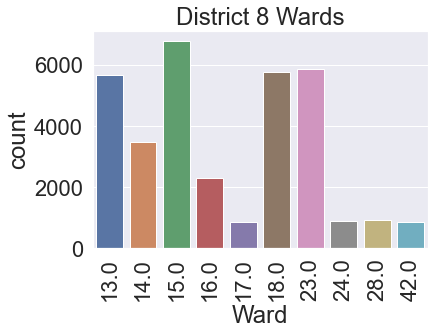

In [12]:
district_8 = data.groupby('district').get_group(8.0)
num_values = len(district_8.ward.unique())
plot_cat_var(district_8.ward.value_counts().index, district_8.ward.value_counts(), 'District 8 Wards', num_values, 'Ward')

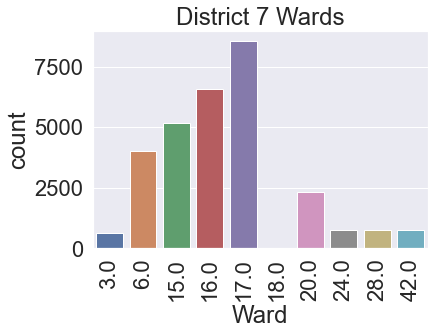

In [13]:
district_8 = data.groupby('district').get_group(7.0)
num_values = len(district_8.ward.unique())
plot_cat_var(district_8.ward.value_counts().index, district_8.ward.value_counts(), 'District 7 Wards', num_values, 'Ward')

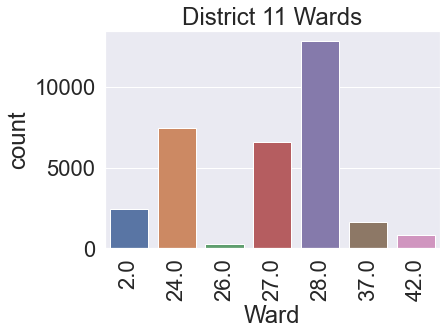

In [14]:
district_8 = data.groupby('district').get_group(11.0)
num_values = len(district_8.ward.unique())
plot_cat_var(district_8.ward.value_counts().index, district_8.ward.value_counts(), 'District 11 Wards', num_values, 'Ward')

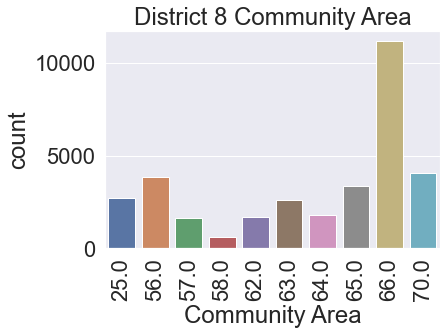

In [15]:
district_8 = data.groupby('district').get_group(8.0)
num_values = len(district_8.community_area.unique())
plot_cat_var(district_8.community_area.value_counts().index, district_8.community_area.value_counts(), 'District 8 Community Area', num_values, 'Community Area')

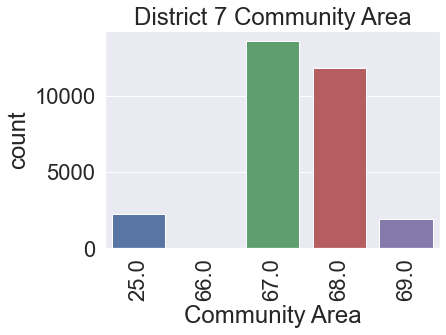

In [16]:
district_8 = data.groupby('district').get_group(7.0)
num_values = len(district_8.community_area.unique())
plot_cat_var(district_8.community_area.value_counts().index, district_8.community_area.value_counts(), 'District 7 Community Area', num_values, 'Community Area')

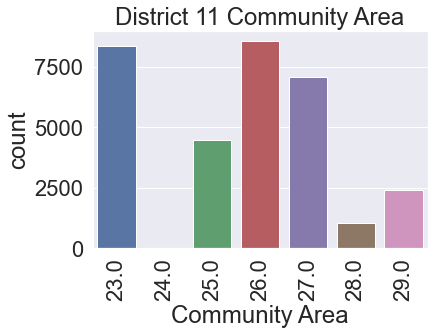

In [17]:
district_8 = data.groupby('district').get_group(11.0)
num_values = len(district_8.community_area.unique())
plot_cat_var(district_8.community_area.value_counts().index, district_8.community_area.value_counts(), 'District 11 Community Area', num_values, 'Community Area')

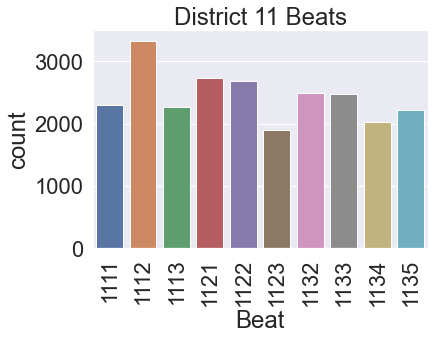

In [9]:
district_8 = data.groupby('district').get_group(11.0)
num_values = len(district_8.beat.unique())
plot_cat_var(district_8.beat.value_counts().index, district_8.beat.value_counts(), 'District 11 Beats', num_values, 'Beat')

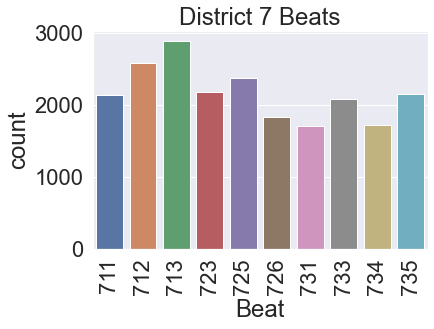

In [10]:
district_8 = data.groupby('district').get_group(7.0)
num_values = len(district_8.beat.unique())
plot_cat_var(district_8.beat.value_counts().index, district_8.beat.value_counts(), 'District 7 Beats', num_values, 'Beat')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
tune = pd.read_csv('tune.csv')

In [3]:
data.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season'],
      dtype='object')

In [6]:
def plot_cat_var(labels, sizes, title, num_values, xaxis):
    
    labels = list(labels)
    sizes = list(sizes)
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
    
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xlabel(xaxis)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    #plt.figure(figsize=(20,10))
    #plt.savefig(title)

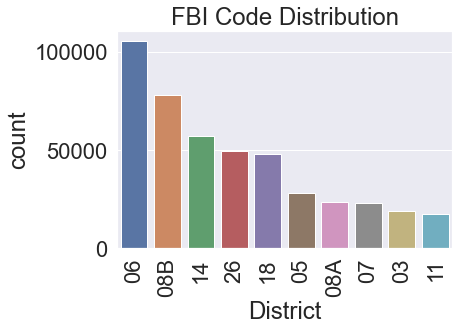

In [9]:
num_values = len(data.fbi_code.unique())
plot_cat_var(data.fbi_code.value_counts().index, data.fbi_code.value_counts(), 'FBI Code Distribution', num_values, 'District')

In [ ]:
# fbi code just tells you same thing as primary type

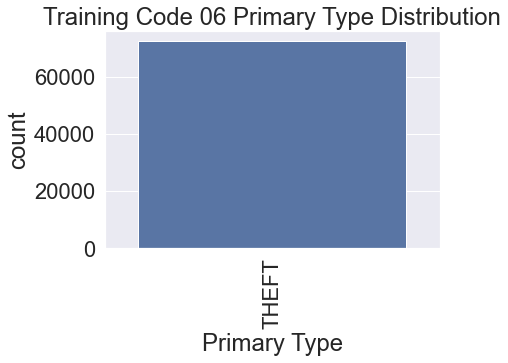

In [12]:
code_06 = train.groupby('fbi_code').get_group('06')
num_values = len(code_06.primary_type.unique())
plot_cat_var(code_06.primary_type.value_counts().index, code_06.primary_type.value_counts(), 'Training Code 06 Primary Type Distribution', num_values, 'Primary Type')

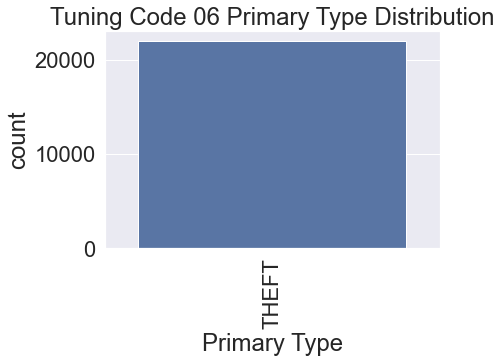

In [13]:
code_06 = tune.groupby('fbi_code').get_group('06')
num_values = len(code_06.primary_type.unique())
plot_cat_var(code_06.primary_type.value_counts().index, code_06.primary_type.value_counts(), 'Tuning Code 06 Primary Type Distribution', num_values, 'Primary Type')

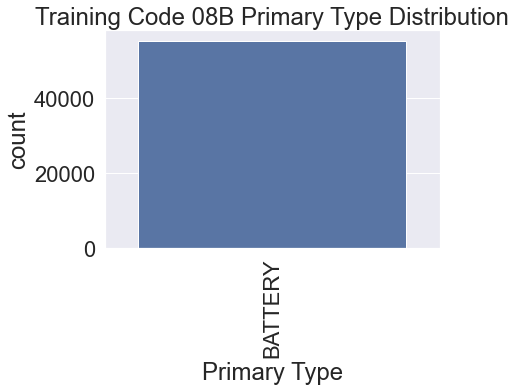

In [14]:
code_08B = train.groupby('fbi_code').get_group('08B')
num_values = len(code_08B.primary_type.unique())
plot_cat_var(code_08B.primary_type.value_counts().index, code_08B.primary_type.value_counts(), 'Training Code 08B Primary Type Distribution', num_values, 'Primary Type')

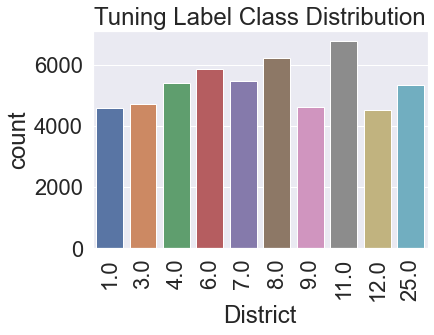

In [15]:
num_values = len(tune.district.value_counts().index)
plot_cat_var(tune.district.value_counts().index, tune.district.value_counts(), 'Tuning Label Class Distribution', num_values, 'District')

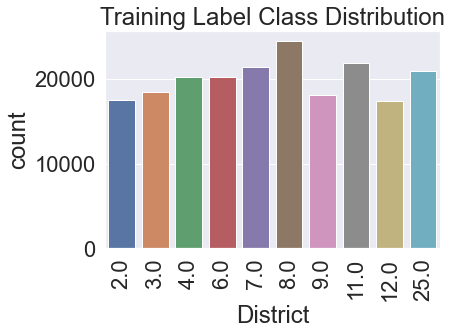

In [16]:
num_values = len(train.district.value_counts().index)
plot_cat_var(train.district.value_counts().index, train.district.value_counts(), 'Training Label Class Distribution', num_values, 'District')


In [17]:
data.primary_type.value_counts()

THEFT                                105555
BATTERY                               91666
CRIMINAL DAMAGE                       57248
NARCOTICS                             50892
ASSAULT                               31323
OTHER OFFENSE                         30819
BURGLARY                              28250
MOTOR VEHICLE THEFT                   23050
DECEPTIVE PRACTICE                    20682
ROBBERY                               18841
CRIMINAL TRESPASS                     13954
WEAPONS VIOLATION                      5895
PROSTITUTION                           4756
PUBLIC PEACE VIOLATION                 3557
OFFENSE INVOLVING CHILDREN             3534
CRIM SEXUAL ASSAULT                    1999
SEX OFFENSE                            1836
INTERFERENCE WITH PUBLIC OFFICER       1214
GAMBLING                               1016
LIQUOR LAW VIOLATION                    984
ARSON                                   875
HOMICIDE                                738
KIDNAPPING                      

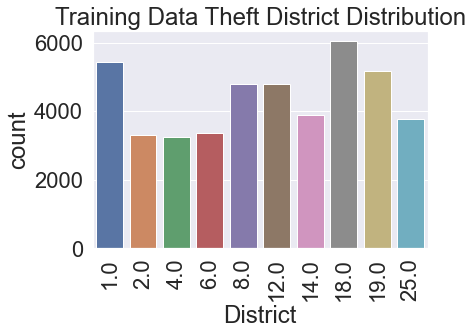

In [26]:
theft = train.groupby('primary_type').get_group('THEFT')
num_values = len(theft.district.value_counts().index)
plot_cat_var(theft.district.value_counts().index, theft.district.value_counts(), 'Training Data Theft District Distribution', num_values, 'District')

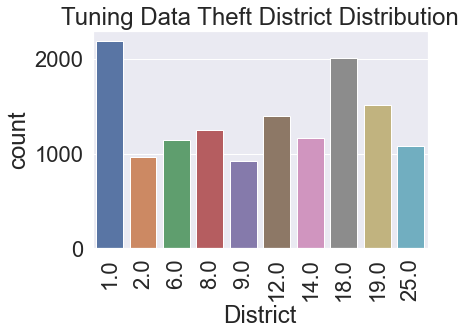

In [27]:
theft = tune.groupby('primary_type').get_group('THEFT')
num_values = len(theft.district.value_counts().index)
plot_cat_var(theft.district.value_counts().index, theft.district.value_counts(), 'Tuning Data Theft District Distribution', num_values, 'District')


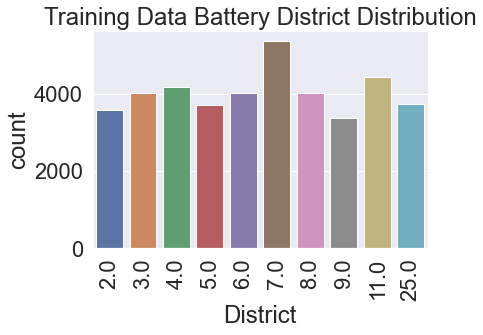

In [28]:
battery = train.groupby('primary_type').get_group('BATTERY')
num_values = len(battery.district.value_counts().index)
plot_cat_var(battery.district.value_counts().index, battery.district.value_counts(), 'Training Data Battery District Distribution', num_values, 'District')

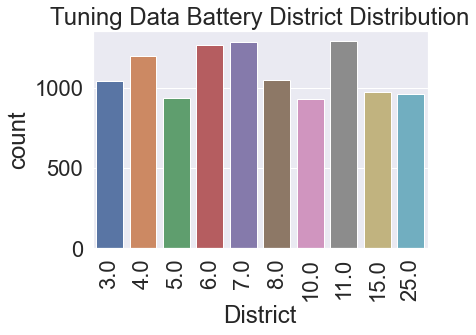

In [29]:
battery = tune.groupby('primary_type').get_group('BATTERY')
num_values = len(battery.district.value_counts().index)
plot_cat_var(battery.district.value_counts().index, battery.district.value_counts(), 'Tuning Data Battery District Distribution', num_values, 'District')

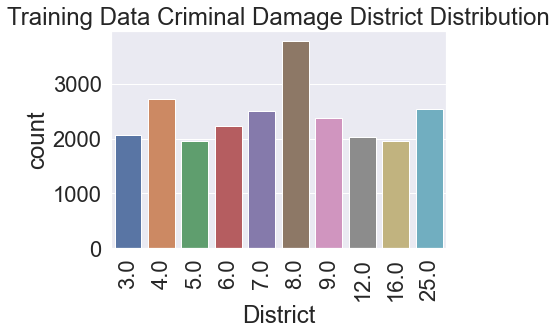

In [31]:
battery = train.groupby('primary_type').get_group('CRIMINAL DAMAGE')
num_values = len(battery.district.value_counts().index)
plot_cat_var(battery.district.value_counts().index, battery.district.value_counts(), 'Training Data Criminal Damage District Distribution', num_values, 'District')

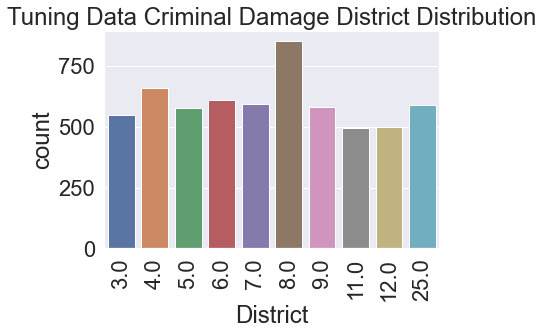

In [33]:
battery = tune.groupby('primary_type').get_group('CRIMINAL DAMAGE')
num_values = len(battery.district.value_counts().index)
plot_cat_var(battery.district.value_counts().index, battery.district.value_counts(), 'Tuning Data Criminal Damage District Distribution', num_values, 'District')

I think it is clear from this that certain districts are just likely to commit certain crimes better 

The first of every month tends to have the most crime, very intersting doesnt hold very true for the rest of the daysm

There also doesn't seem to be a trend between number of crimes committed and month, but there does seem to be a trend
between that and year

Season doesn't seem to show much variation among number of crimes committed

Number of successful arrests overall have been going down throughout the years

In [ ]:
Certain districts just seem to have more crimes

In [5]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season'],
      dtype='object')

In [ ]:

plot_cat_var(labels, sizes, title, num_values, xaxis)

[Text(0, 0, '8.0'),
 Text(1, 0, '11.0'),
 Text(2, 0, '7.0'),
 Text(3, 0, '6.0'),
 Text(4, 0, '25.0'),
 Text(5, 0, '4.0'),
 Text(6, 0, '3.0'),
 Text(7, 0, '9.0'),
 Text(8, 0, '12.0'),
 Text(9, 0, '2.0'),
 Text(10, 0, '19.0'),
 Text(11, 0, '5.0'),
 Text(12, 0, '18.0'),
 Text(13, 0, '15.0'),
 Text(14, 0, '10.0'),
 Text(15, 0, '1.0'),
 Text(16, 0, '14.0'),
 Text(17, 0, '16.0'),
 Text(18, 0, '22.0'),
 Text(19, 0, '24.0'),
 Text(20, 0, '17.0'),
 Text(21, 0, '20.0'),
 Text(22, 0, '31.0'),
 Text(23, 0, '21.0')]

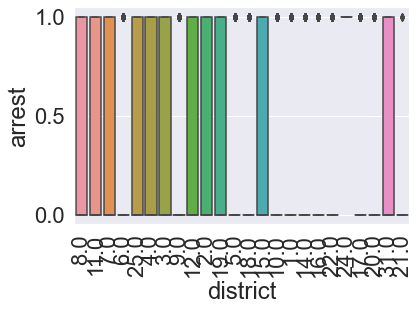

In [35]:
ax = sns.boxplot(y='arrest', x='district', data=data)
ax.set_xticklabels(labels=data.district.value_counts().index, rotation=90)

In [36]:
train.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'DateTime', 'time', 'day', 'month', 'season'],
      dtype='object')

In [39]:
train.iucr.value_counts()

0460    27921
0820    27542
0486    25874
1320    19433
1310    19347
        ...  
3740        1
3980        1
1620        1
3610        1
2251        1
Name: iucr, Length: 330, dtype: int64

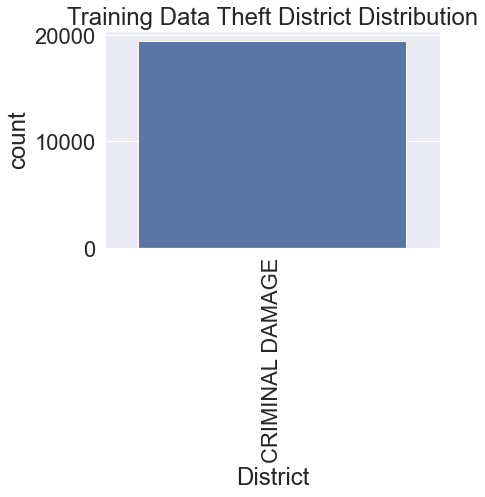

In [44]:
theft = train.groupby('iucr').get_group('1320')
num_values = len(theft.primary_type.value_counts().index)
plot_cat_var(theft.primary_type.value_counts().index, theft.primary_type.value_counts(), 'Training Data Theft District Distribution', num_values, 'District')

In [11]:
train.district.value_counts()

8.0     24423
11.0    21890
7.0     21376
25.0    20886
6.0     20274
4.0     20186
3.0     18403
9.0     18044
2.0     17525
12.0    17424
19.0    15977
5.0     15778
15.0    15543
18.0    14975
10.0    14798
14.0    14680
1.0     12747
22.0    11781
16.0    11714
24.0    10697
17.0    10318
20.0     6348
31.0        7
21.0        1
Name: district, dtype: int64

In [ ]:
# most frequent baseline is 24423/500000 (0.048846), which our system blows out of the water

In [4]:
data = data[['year','primary_type','description','location_description','arrest','domestic','beat','district','ward','community_area']]

In [5]:
data.columns

Index(['year', 'primary_type', 'description', 'location_description', 'arrest',
       'domestic', 'beat', 'district', 'ward', 'community_area'],
      dtype='object')

In [29]:
len(data.description.unique())

450

In [6]:
x = data.primary_type.value_counts()

In [7]:
other_offense = data.groupby('primary_type').get_group('OTHER OFFENSE')

In [3]:
def plot_cat_var(labels, sizes, title, num_values, xaxis):
    
    labels = list(labels)
    sizes = list(sizes)
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
    
    print(len(labels))
    print(len(sizes))
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xlabel(xaxis)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    #plt.figure(figsize=(20,10))
    #plt.savefig(title)

In [52]:
def plot_numerical_variables_distribution(data, variable, title):
    
    ax = sns.distplot(data[variable])
    ax.set_title(title)
    ax.set_xlabel(variable)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.savefig(title)

In [23]:
len(data.district.value_counts())

23

In [24]:
len(data.district.value_counts().index)

23

In [21]:
plot_cat_var(data.district.value_counts().index, data.district.value_counts(), 'Chicago Crime District Breakdown', len(data.district.value_counts().index))

10
15


ValueError: Grouper and axis must be same length

In [18]:
len(data.ward.unique())

50

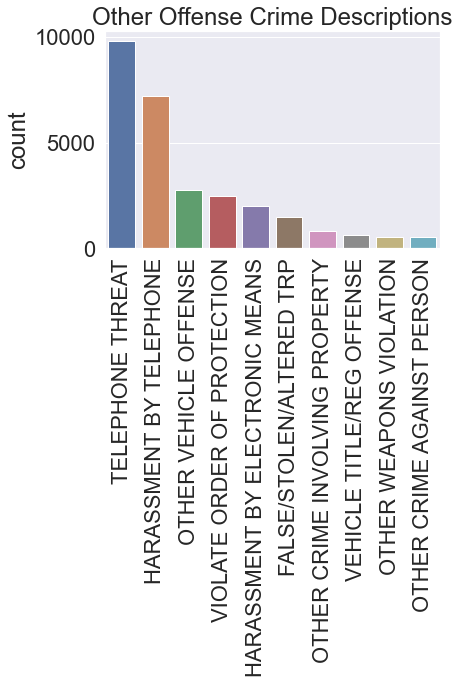

In [12]:
plot_cat_var(other_offense.description.value_counts().index, other_offense.description.value_counts(), 'Other Offense Crime Descriptions', len(other_offense.description.value_counts()))

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.hist(data.crimes_per_district)

AttributeError: 'DataFrame' object has no attribute 'crimes_per_district'

23
23
23
More than 10 values!
10
10
after if statement
10
10


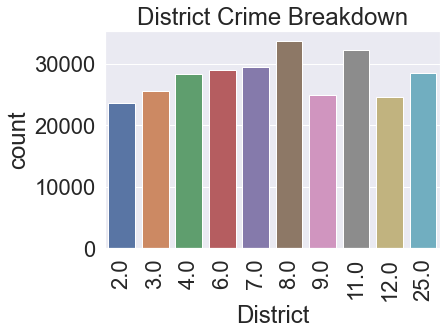

In [48]:
plot_cat_var(data.district.value_counts().index, data.district.value_counts(), 'District Crime Breakdown', len(data.district.value_counts()),'District')

In [50]:
data.isna().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
unique_key                 0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description       0
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
fbi_code                   0
x_coordinate            4900
y_coordinate            4900
year                       0
updated_on                 0
latitude                4900
longitude               4900
location                4900
dtype: int64

In [53]:
data.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

10
10


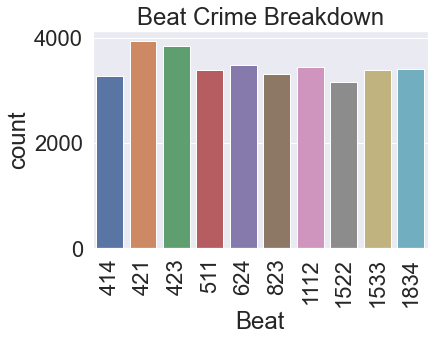

In [54]:
plot_cat_var(data.beat.value_counts().index, data.beat.value_counts(), 'Beat Crime Breakdown', len(data.beat.value_counts()),'Beat')

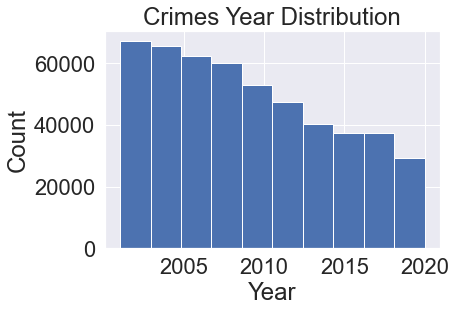

In [55]:
plt.hist(data.year)
plt.title('Crimes Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

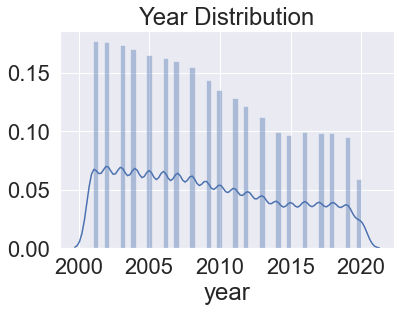

In [57]:
plot_numerical_variables_distribution(data, 'year', 'Year Distribution')

In [59]:
import matplotlib.pyplot as plt

In [78]:
def pie_chart(labels, sizes, title, num_values):
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    plt.pie(sizes, labels=labels, autopct='%1.0f%%')
    plt.title = title
    plt.show() 

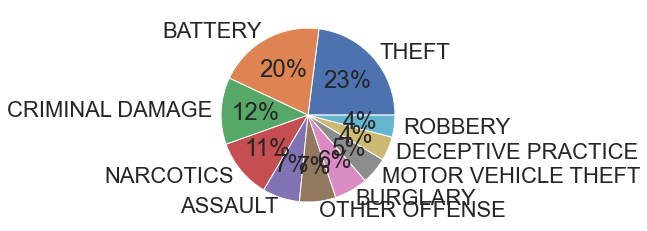

In [79]:
pie_chart(list(data.primary_type.value_counts().index), list(data.primary_type.value_counts()), 'Crime Primary Type Breakdown', len(data.primary_type.value_counts()))

10
10


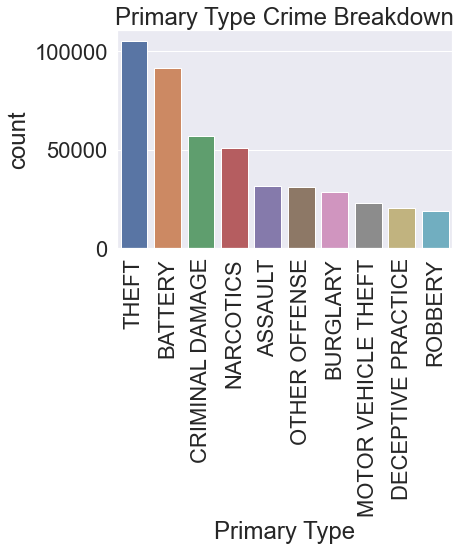

In [80]:
plot_cat_var(data.primary_type.value_counts().index, data.primary_type.value_counts(), 'Primary Type Crime Breakdown', len(data.primary_type.value_counts()),'Primary Type')

10
10


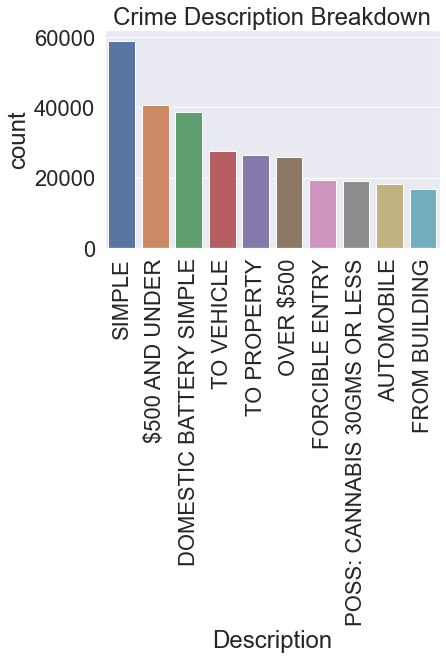

In [81]:
plot_cat_var(data.description.value_counts().index, data.description.value_counts(), 'Crime Description Breakdown', len(data.description.value_counts()),'Description')

2
2


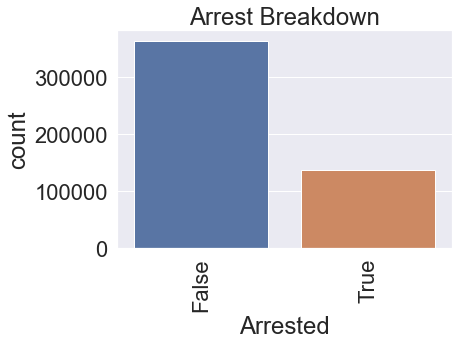

In [82]:
plot_cat_var(data.arrest.value_counts().index, data.arrest.value_counts(), 'Arrest Breakdown', len(data.arrest.value_counts()),'Arrested')

In [83]:
data.district.value_counts()

8.0     33658
11.0    32309
7.0     29470
6.0     28919
25.0    28499
4.0     28329
3.0     25546
9.0     24947
12.0    24592
2.0     23707
18.0    22339
5.0     22260
19.0    22212
15.0    21745
10.0    21451
1.0     19786
14.0    19396
16.0    16712
22.0    16109
24.0    15049
17.0    14262
20.0     8691
31.0       12
Name: district, dtype: int64

In [88]:

for dist in data.district.unique():
    print(f" District: {dist}, Number of Crimes: {data.district.value_counts()[dist]}, Distribution Percentage: {100* round((data.district.value_counts()[dist]/500000), 2)}")

 District: 19.0, Number of Crimes: 22212, Distribution Percentage: 4.0
 District: 4.0, Number of Crimes: 28329, Distribution Percentage: 6.0
 District: 16.0, Number of Crimes: 16712, Distribution Percentage: 3.0
 District: 14.0, Number of Crimes: 19396, Distribution Percentage: 4.0
 District: 1.0, Number of Crimes: 19786, Distribution Percentage: 4.0
 District: 20.0, Number of Crimes: 8691, Distribution Percentage: 2.0
 District: 25.0, Number of Crimes: 28499, Distribution Percentage: 6.0
 District: 18.0, Number of Crimes: 22339, Distribution Percentage: 4.0
 District: 6.0, Number of Crimes: 28919, Distribution Percentage: 6.0
 District: 11.0, Number of Crimes: 32309, Distribution Percentage: 6.0
 District: 2.0, Number of Crimes: 23707, Distribution Percentage: 5.0
 District: 9.0, Number of Crimes: 24947, Distribution Percentage: 5.0
 District: 10.0, Number of Crimes: 21451, Distribution Percentage: 4.0
 District: 8.0, Number of Crimes: 33658, Distribution Percentage: 7.000000000000001